In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ref_rslt_df = pd.read_csv("../data/ligands/table2.csv")

In [3]:
ref_rslt_df

,No.,Class,Smiles,7xp5,7xp6
0,b1,1,CC1=CC(=O)C(C(=O)O)C(C)C1,-6.1,-5.3
1,b2,1,C1=CC=C(C=C1)C(=O)N-O,-6.1,-5.7
2,b3,1,CC1CCC(C(C1)O)C(=O)O,-5.5,-5.9
3,b4,1,CC(C1=CC=CC=C1)N(C)C(=O),-5.6,-5.1
4,b5,1,O=C1C=C(C=CC1=O)C(=O)O,-6.8,-5.6
5,s1,0,COC(=O)C(CO)OCC(O)C,-4.7,-4.3
6,s2,0,CC(CO)OCCO,-4.4,-4.1
7,s3,0,CCOC(=O)C(CO)C(CO)O,-4.3,-4.1
8,s4,0,C1C(C(C(C(O1)O)O)O)O,-5.7,-5.1
9,s5,0,OC[C@H]1O[C@H](C[C@@H]1O)O,-5.2,-4.4


In [4]:
dock_7xp5_rslt_df = pd.read_csv(
    "../results/processed/lowest_conf/7XP5/docking_results.txt",
    names=["ligand", "score"],
)
dock_7xp6_rslt_df = pd.read_csv(
    "../results/processed/lowest_conf/7XP6/docking_results.txt",
    names=["ligand", "score"],
)

In [5]:
dock_7xp5_rslt_df.head(5)

,ligand,score
0,b1,-6.0
1,b2,-6.2
2,b3,-5.7
3,b4,-5.4
4,b5,-6.4


Text(0.5, 1.0, '7XP5')

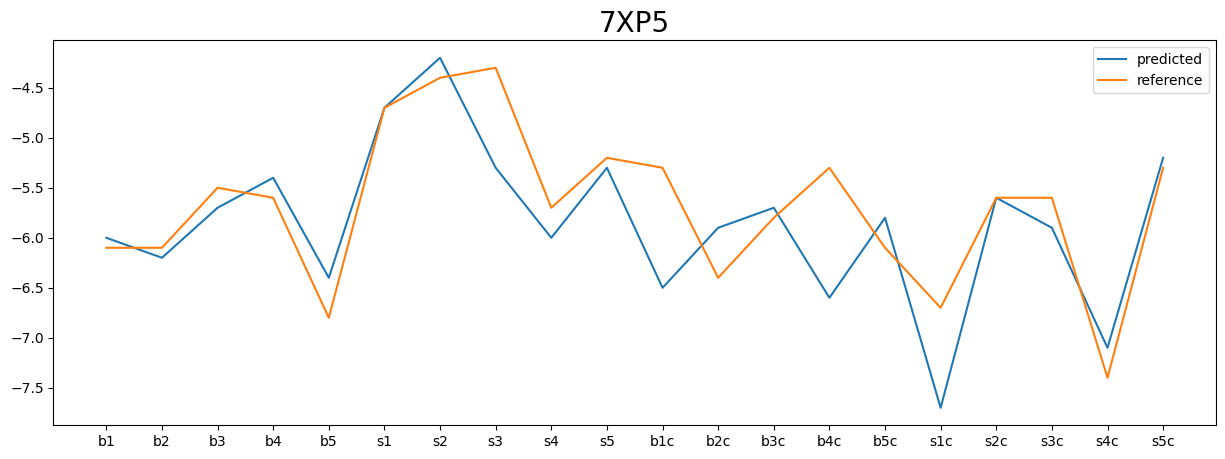

In [6]:
plt.figure(figsize=(15, 5))
xticks = dock_7xp5_rslt_df["ligand"]
plt.plot(xticks, dock_7xp5_rslt_df["score"], label="predicted")
plt.plot(xticks, ref_rslt_df["7xp5"], label="reference")
plt.legend()
plt.title("7XP5", fontsize=20)

Text(0.5, 1.0, '7XP5')

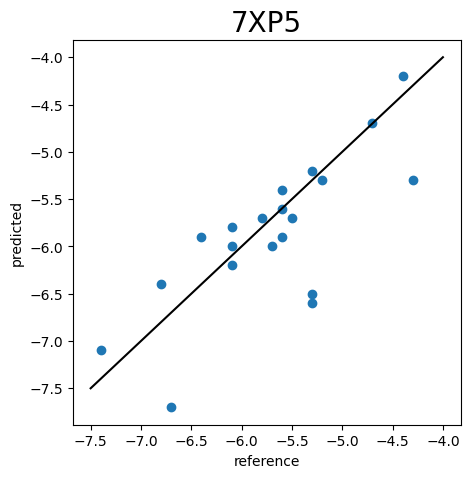

In [7]:
plt.figure(figsize=(5, 5))
plt.plot(ref_rslt_df["7xp5"], dock_7xp5_rslt_df["score"], "o")
plt.plot([-7.5, -4], [-7.5, -4], "-", color="black")
plt.xlabel("reference")
plt.ylabel("predicted")
plt.title("7XP5", fontsize=20)

Text(0.5, 1.0, '7XP6')

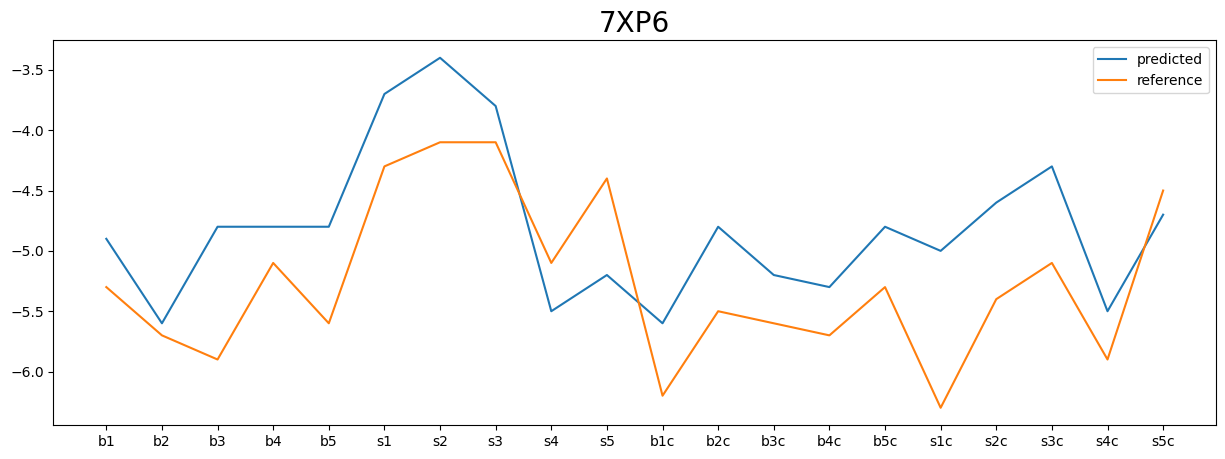

In [8]:
plt.figure(figsize=(15, 5))
xticks = dock_7xp6_rslt_df["ligand"]
plt.plot(xticks, dock_7xp6_rslt_df["score"], label="predicted")
plt.plot(xticks, ref_rslt_df["7xp6"], label="reference")
plt.legend()
plt.title("7XP6", fontsize=20)

Text(0.5, 1.0, '7XP6')

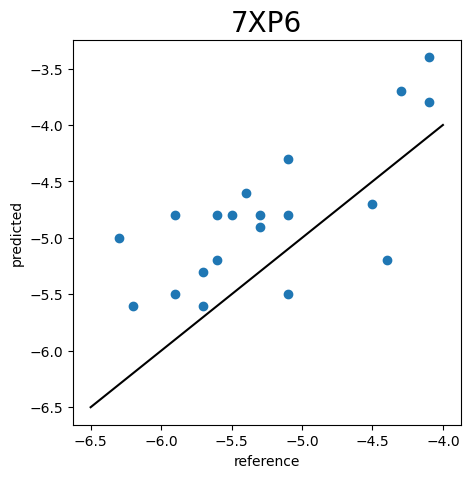

In [9]:
plt.figure(figsize=(5, 5))
plt.plot(ref_rslt_df["7xp6"], dock_7xp6_rslt_df["score"], "o")
plt.plot([-6.5, -4], [-6.5, -4], "-", color="black")
plt.xlabel("reference")
plt.ylabel("predicted")
plt.title("7XP6", fontsize=20)

In [10]:
# make groups
groups = ["b"] * 5 + ["s"] * 5 + ["bc"] * 5 + ["sc"] * 5

# add groups
ref_rslt_df["group"] = groups
dock_7xp5_rslt_df["group"] = groups
dock_7xp6_rslt_df["group"] = groups

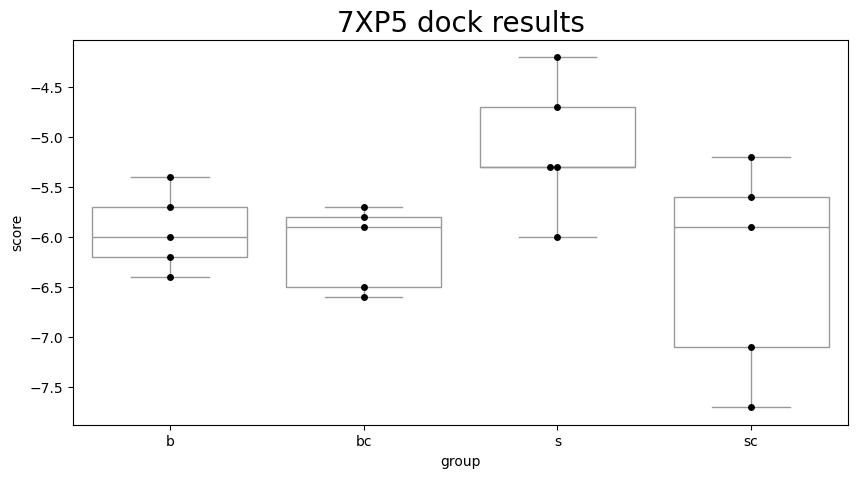

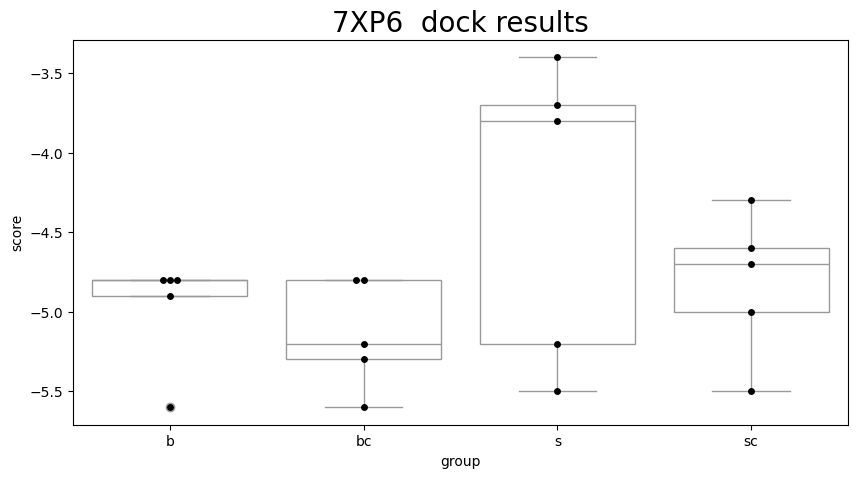

In [11]:
# Swarm box plot by groups

# 7xp5
plt.figure(figsize=(10, 5))
plt.title("7XP5 dock results", fontsize=20)
for key, group in dock_7xp5_rslt_df.groupby("group"):
    sns.boxplot(data=group, x="group", y="score", color="white", linewidth=1)
    sns.swarmplot(data=group, x="group", y="score", color="black")

# 7xp6
plt.figure(figsize=(10, 5))
plt.title("7XP6  dock results", fontsize=20)
for key, group in dock_7xp6_rslt_df.groupby("group"):
    sns.boxplot(data=group, x="group", y="score", color="white", linewidth=1)
    sns.swarmplot(data=group, x="group", y="score", color="black")

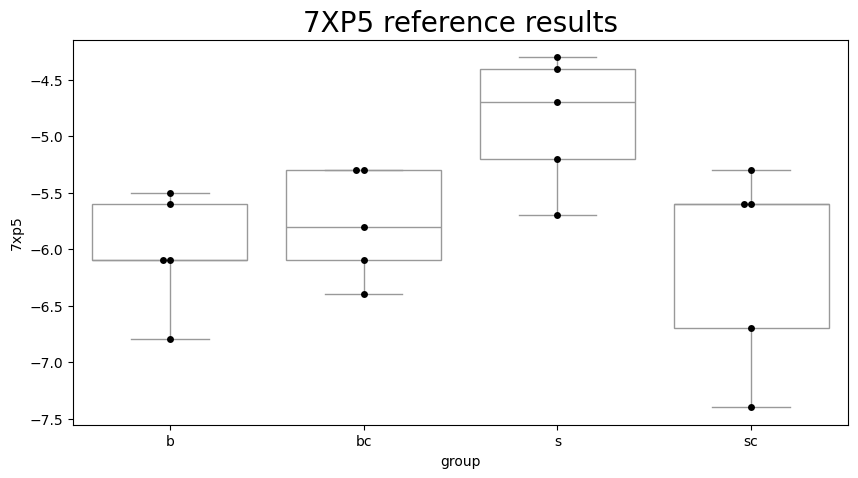

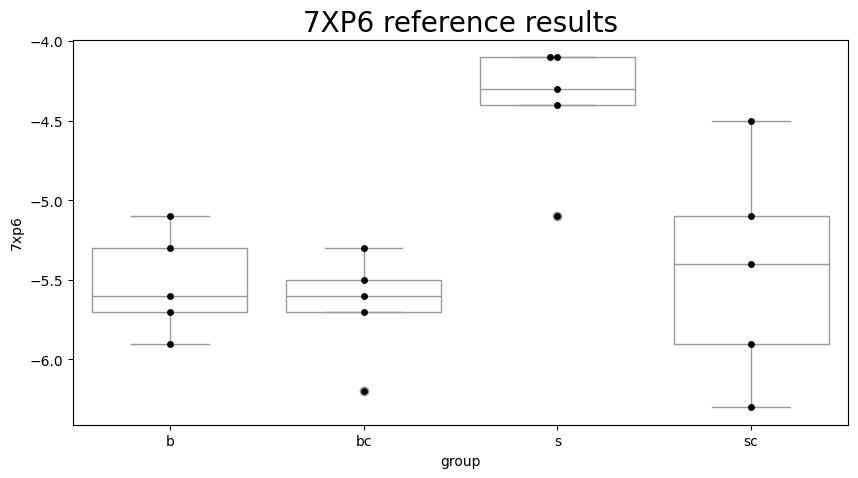

In [12]:
# reference
plt.figure(figsize=(10, 5))
plt.title("7XP5 reference results", fontsize=20)
for key, group in ref_rslt_df.groupby("group"):
    sns.boxplot(data=group, x="group", y="7xp5", color="white", linewidth=1)
    sns.swarmplot(data=group, x="group", y="7xp5", color="black")

plt.figure(figsize=(10, 5))
plt.title("7XP6 reference results", fontsize=20)
for key, group in ref_rslt_df.groupby("group"):
    sns.boxplot(data=group, x="group", y="7xp6", color="white", linewidth=1)
    sns.swarmplot(data=group, x="group", y="7xp6", color="black")

# Visualize Docking


In [29]:
import py3Dmol
from rdkit import Chem


def view_docked(receptor_file, ligand_file):
    # Load the receptor
    with open(receptor_file, "r") as f:
        receptor = f.read()
    # Load the ligand with rdkit.sdMolSupplier
    suppl = Chem.SDMolSupplier(ligand_file)
    # Get the first molecule
    ligand = Chem.MolToMolBlock(suppl[0])

    # Create a viewer
    view = py3Dmol.view(width=800, height=600)
    # Add the receptor
    view.addModel(receptor, "pdb")
    view.setStyle({"cartoon": {}})
    # Add the ligand
    view.addModel(ligand, "mol")
    view.setStyle({"model": 1}, {"stick": {"colorscheme": "greenCarbon"}})
    # Zoom to the ligand
    # view.zoomTo({"model": 1})
    view.zoomTo()
    # Show the viewer
    return view.show()

In [30]:
ligand_file = "../results/processed/lowest_conf/7XP5/docked/b1.sdf"
receptor_file = "../data/receptors/7XP5.pdb"

# view = view_docked(receptor_file, ligand_file)
# view.show()
view_docked(receptor_file, ligand_file)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.